# Лабораторная работа №8 (Проведение исследований моделями обнаружения и распознавания объектов)

# 1. Выбор начальных условий

## 1.a Выбрать набор данных для задачи классификации (у каждого студента должен быть уникальный набор данных) и обосновать его выбор (реальная практическая задача)

https://www.kaggle.com/datasets/sayedgamal99/smoke-fire-detection-yolo

Для данной работы я решил выбрать датасет для детекции огня и дыма. Решение данной задачи позволяет находить возгарания и задымление по камерам и предотвращать пожары.

Как основную метрику выберем mAP0.5 и mAP0.5:0.95

In [2]:
import kagglehub

path = kagglehub.dataset_download("sayedgamal99/smoke-fire-detection-yolo")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/smoke-fire-detection-yolo


Загрузим библиотеки ultrylytics для работы с YOLO

In [ ]:
%pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

Импортируем модель YOLO

In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model = YOLO("yolo11n.pt")

100%|██████████| 5.35M/5.35M [00:00<00:00, 155MB/s]


Загрузим датасет используя аннотацию из data.yaml

In [3]:
import yaml
import os
from pprint import pprint

root = path
yml_file_path = f"{root}/data.yaml"

with open(yml_file_path, 'r') as file: data = yaml.safe_load(file)

data['train'] = f'{root}/data/train'
data['val']   = f'{root}/data/val'
data['test']  = f'{root}/data/test'

print(data)
output_path = './updated_config.yml'
with open(output_path, 'w') as file: yaml.dump(data, file, default_flow_style=False)

{'path': '/kaggle/working/D Fire Dataset', 'train': '/kaggle/input/smoke-fire-detection-yolo/data/train', 'val': '/kaggle/input/smoke-fire-detection-yolo/data/val', 'test': '/kaggle/input/smoke-fire-detection-yolo/data/test', 'names': ['smoke', 'fire'], 'nc': 2, 'train_count': 14122, 'val_count': 3099, 'test_count': 4306}


Обучим модель

In [ ]:
train_results = model.train(
    data=output_path,
    epochs=10,
    imgsz=480)

In [ ]:
from PIL import Image
from matplotlib import pyplot as plt

Визуализируем основные метрики. Ниже представлена матрица ошибок.

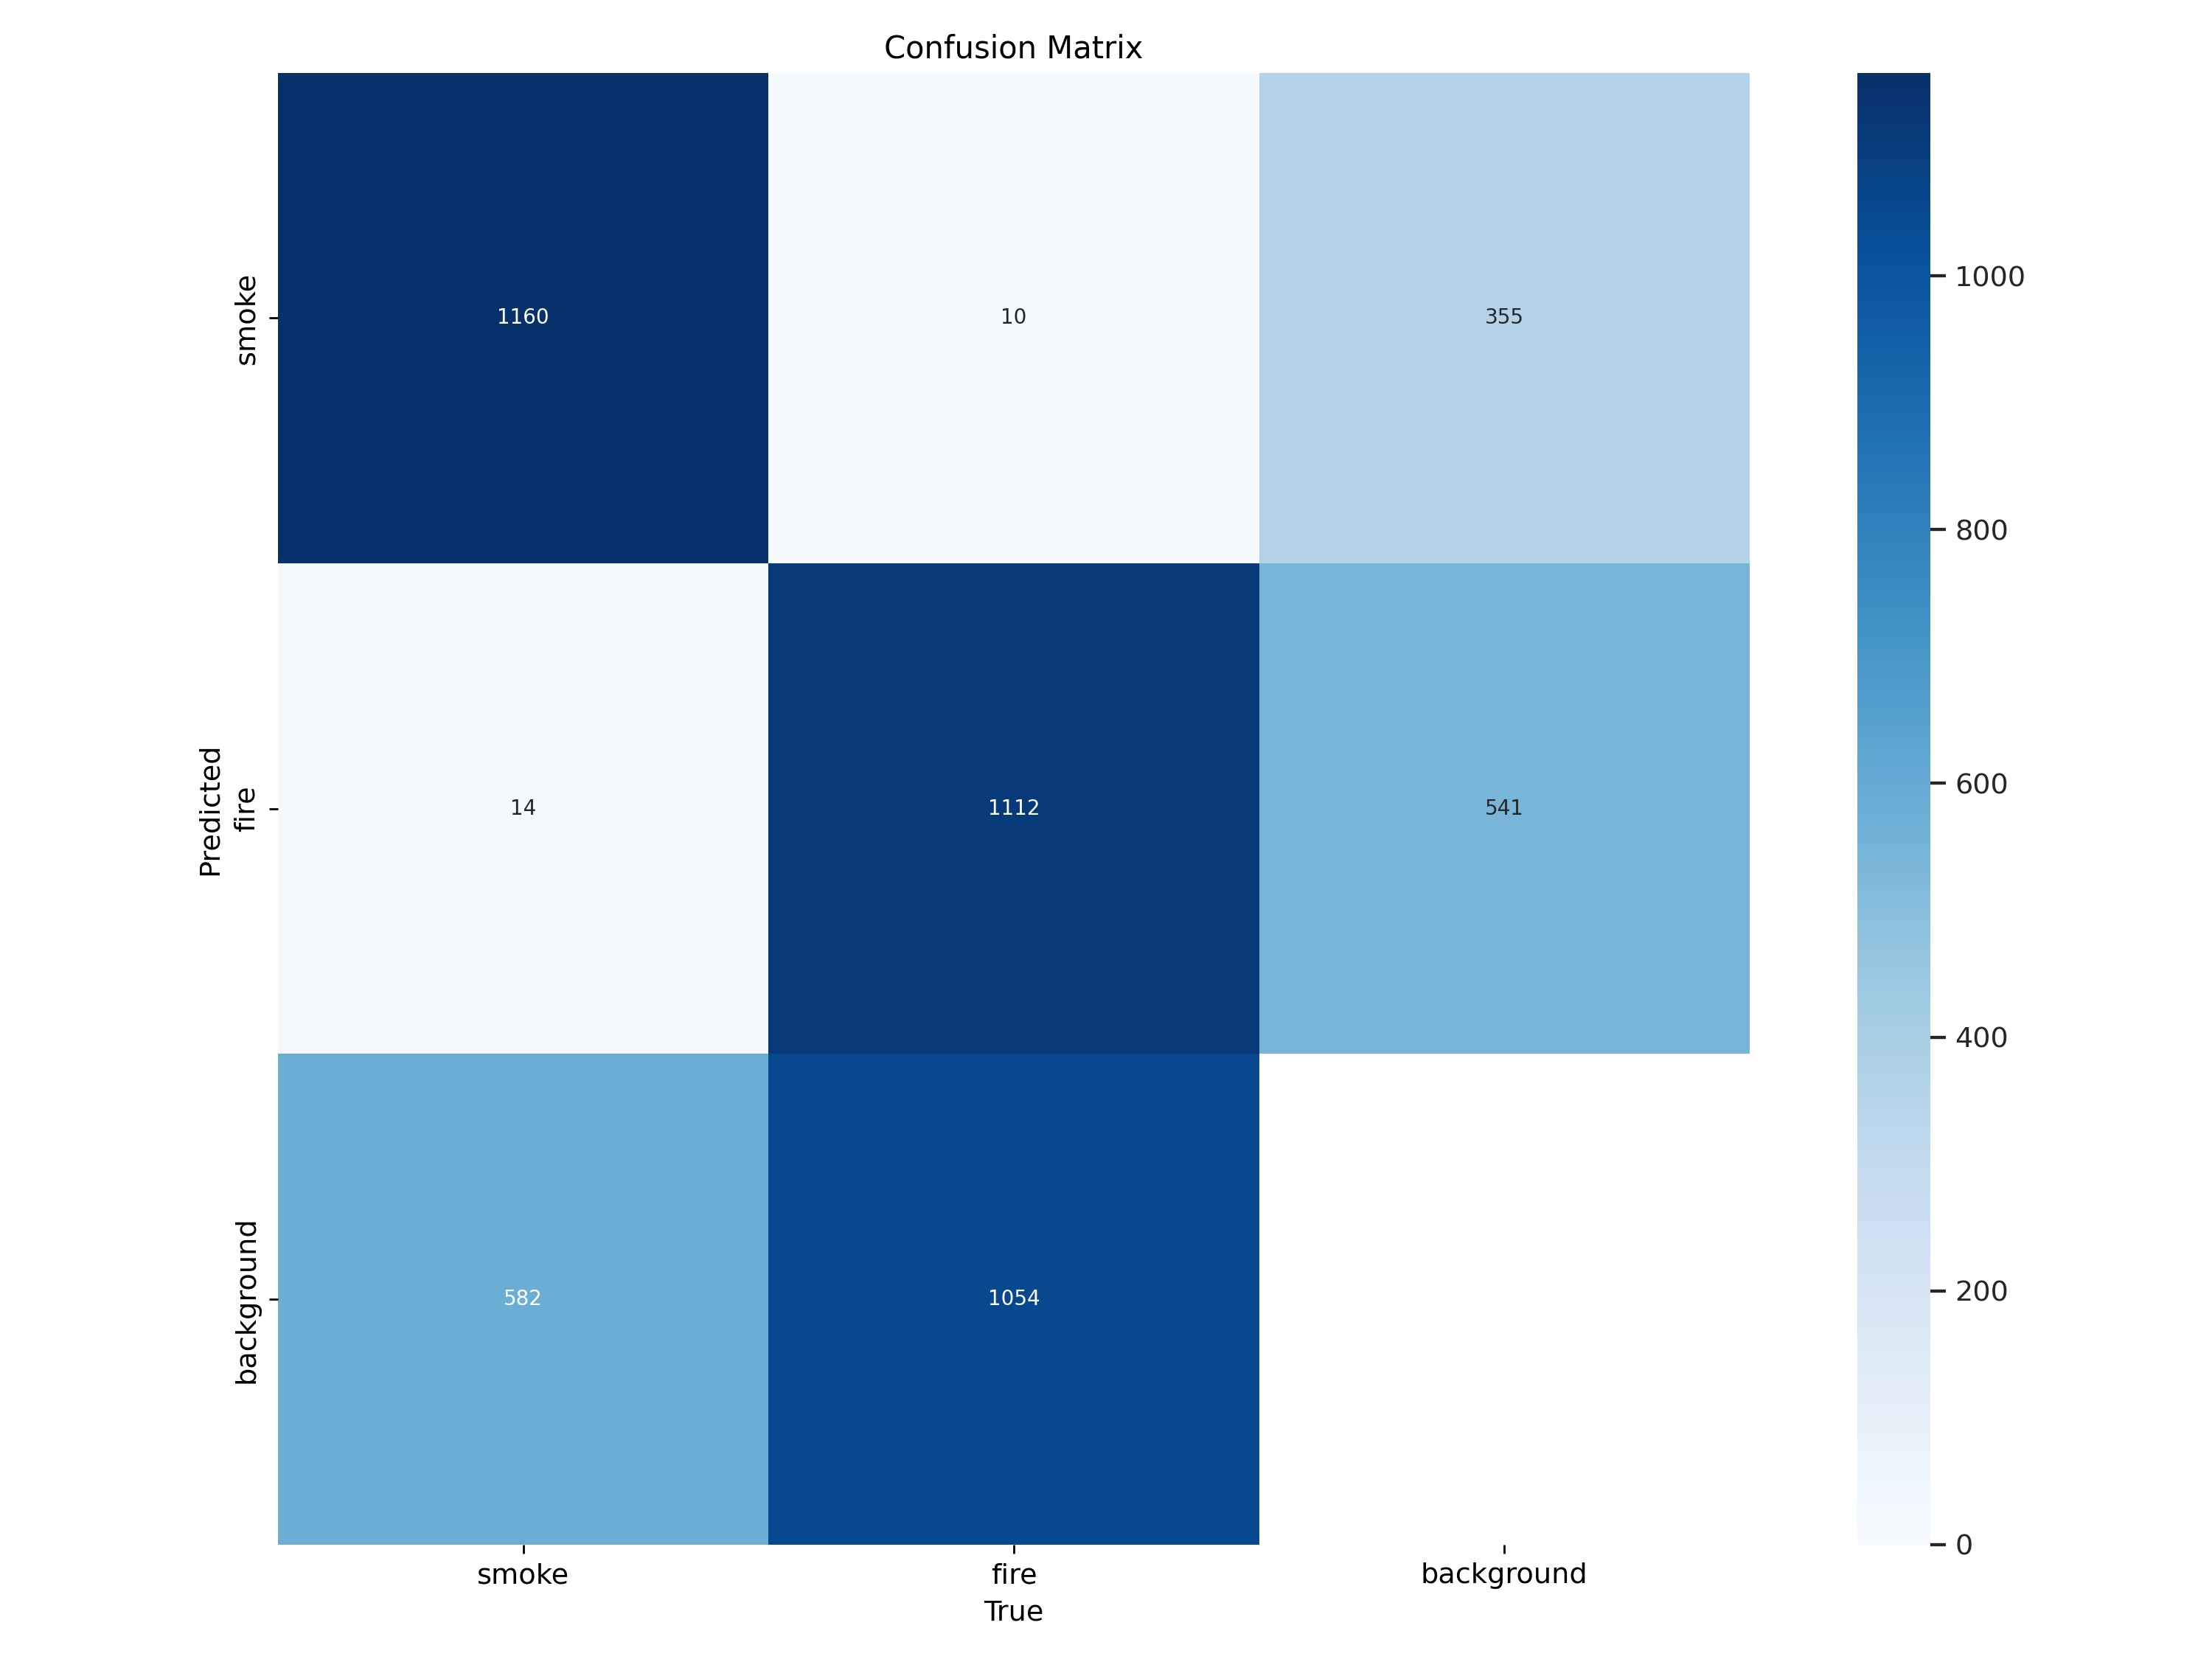

In [ ]:
Image.open(f"runs/detect/train/confusion_matrix.png")

Также выведем графики основных методов

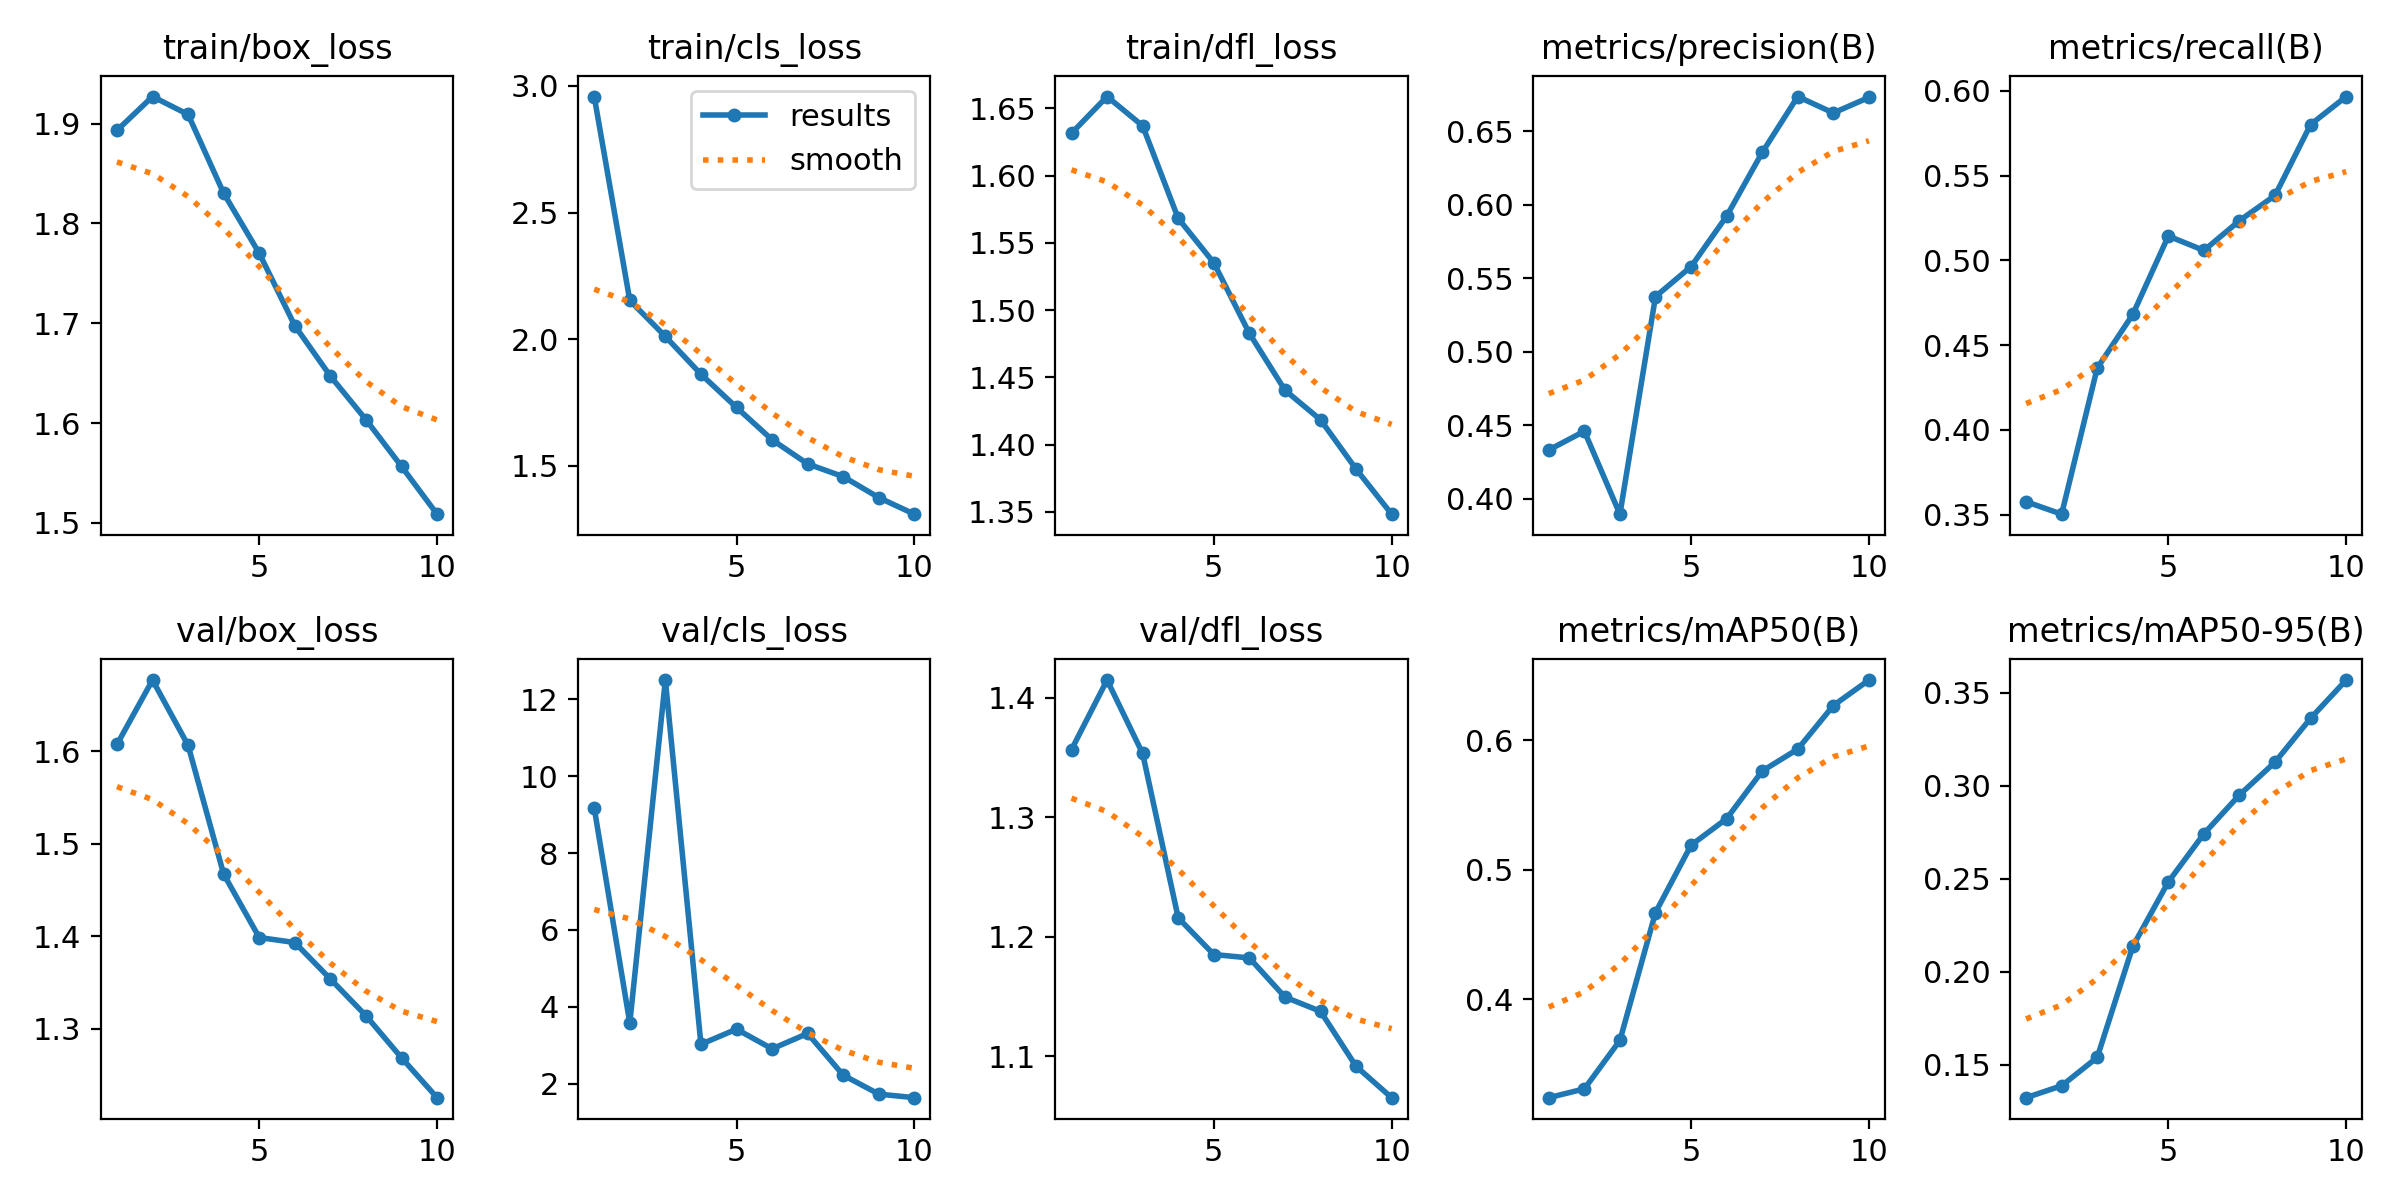

In [ ]:
Image.open(f"runs/detect/train/results.png")

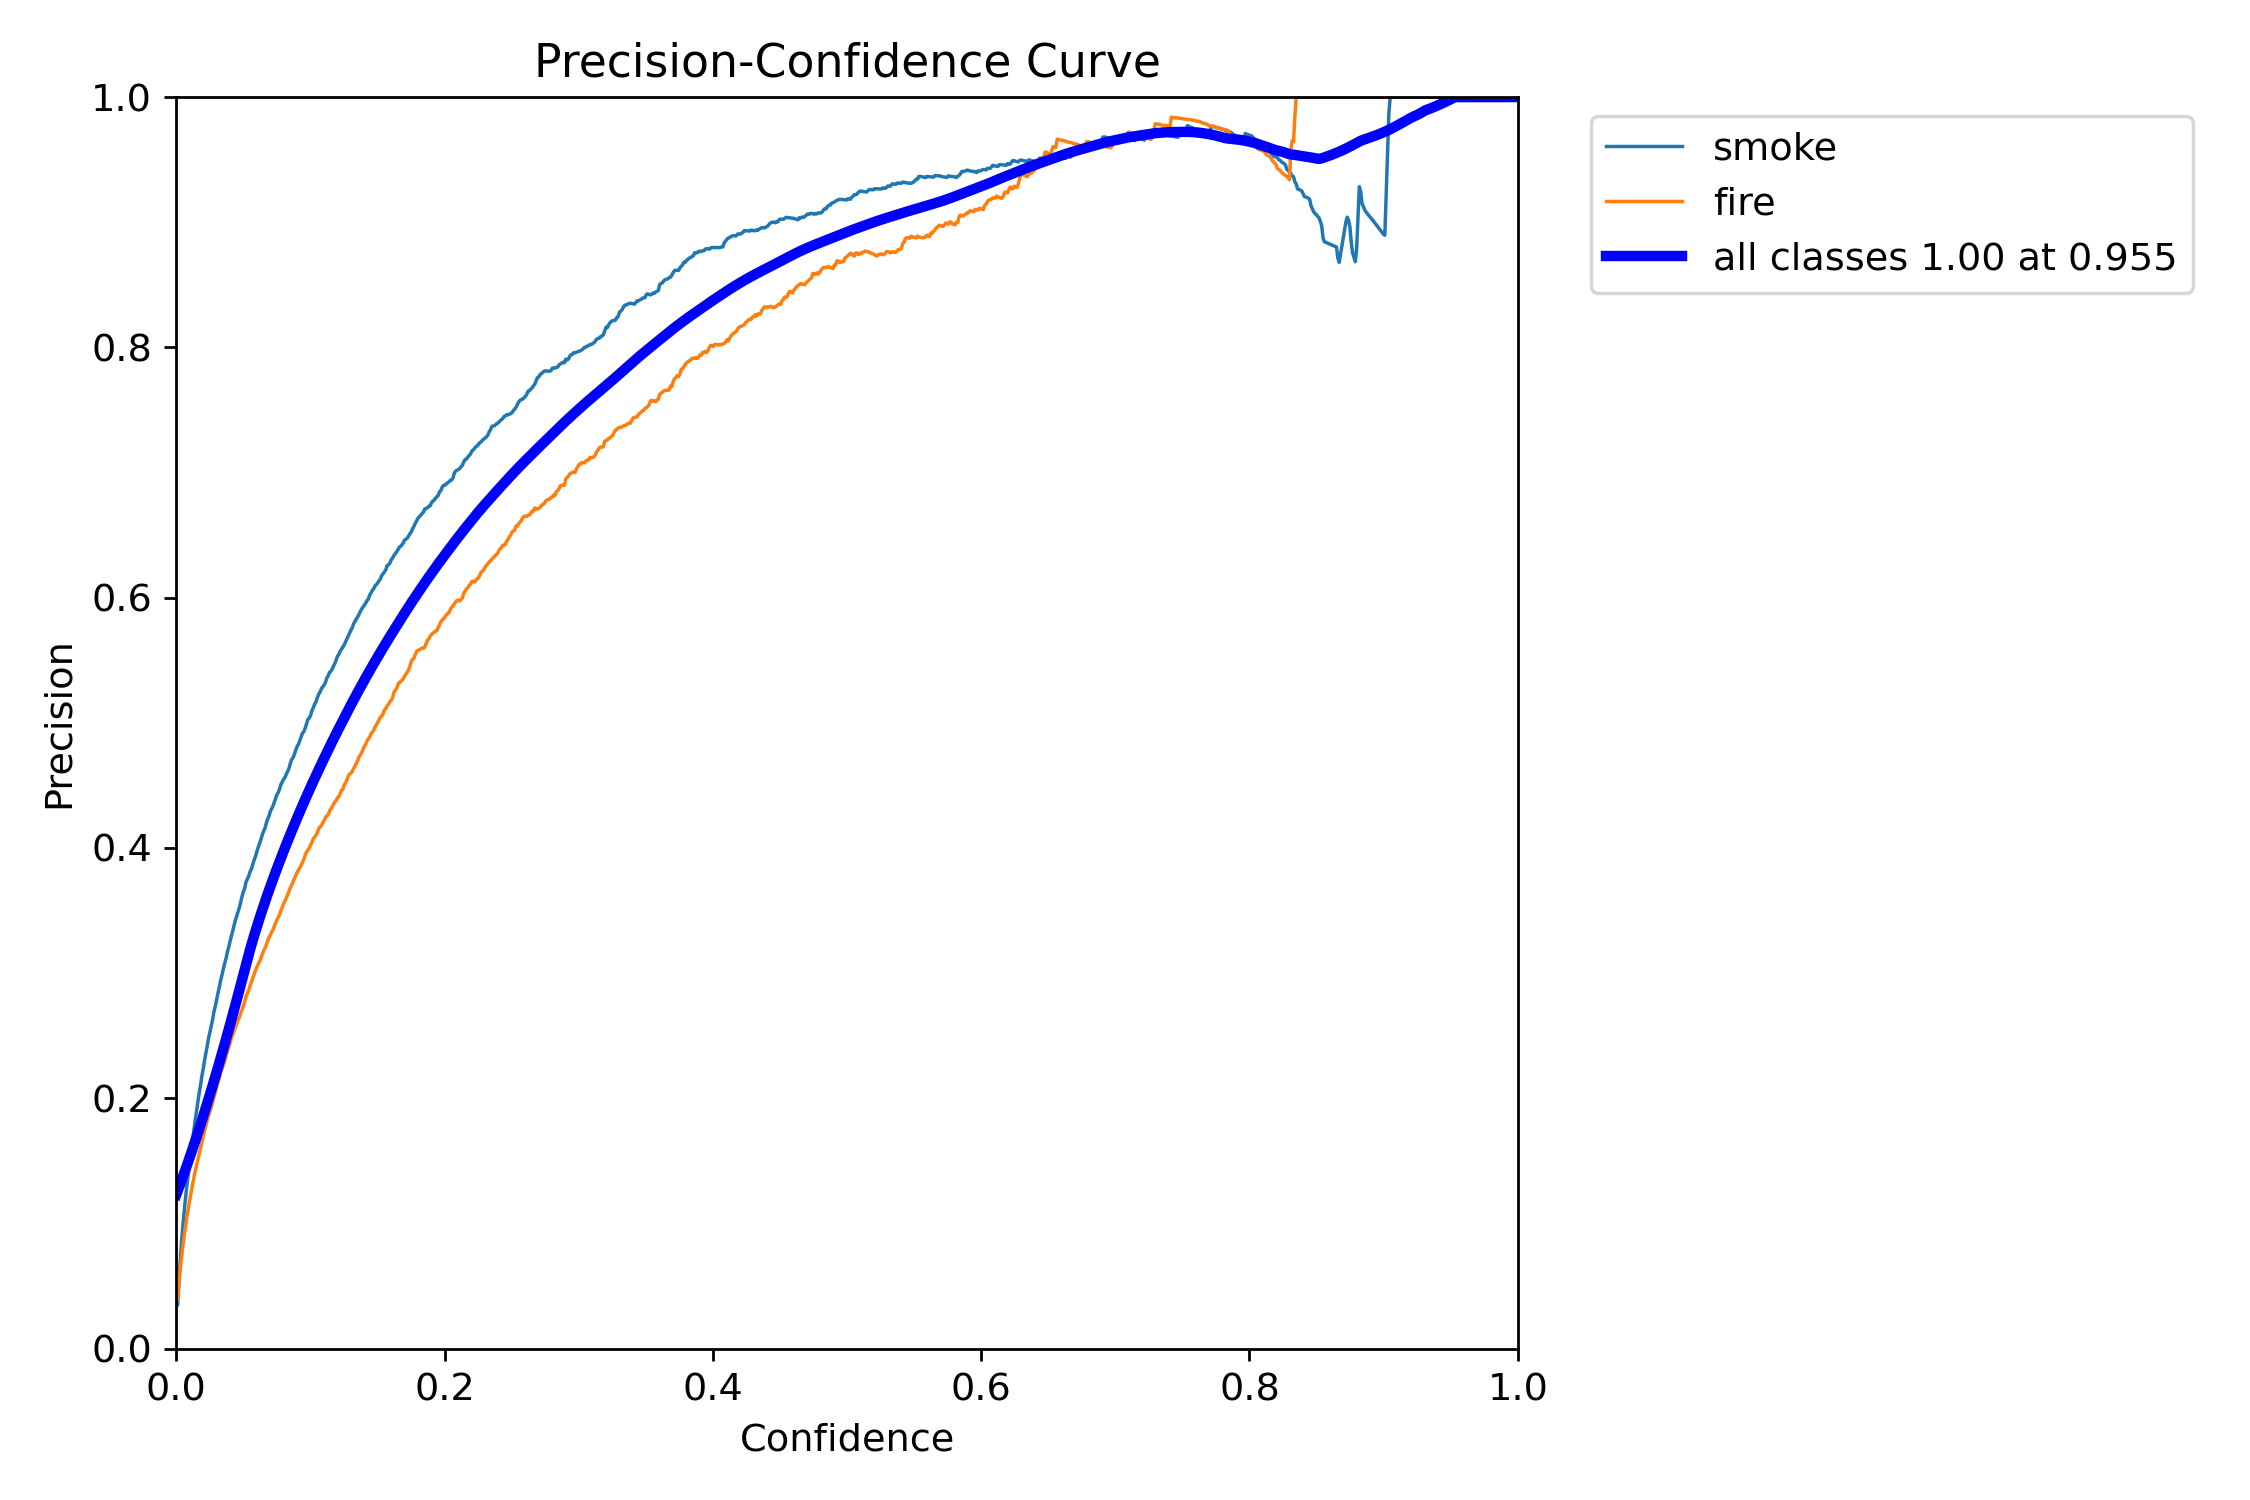

In [ ]:
Image.open(f"runs/detect/train/P_curve.png")

Нижне представлена примеры работы модели

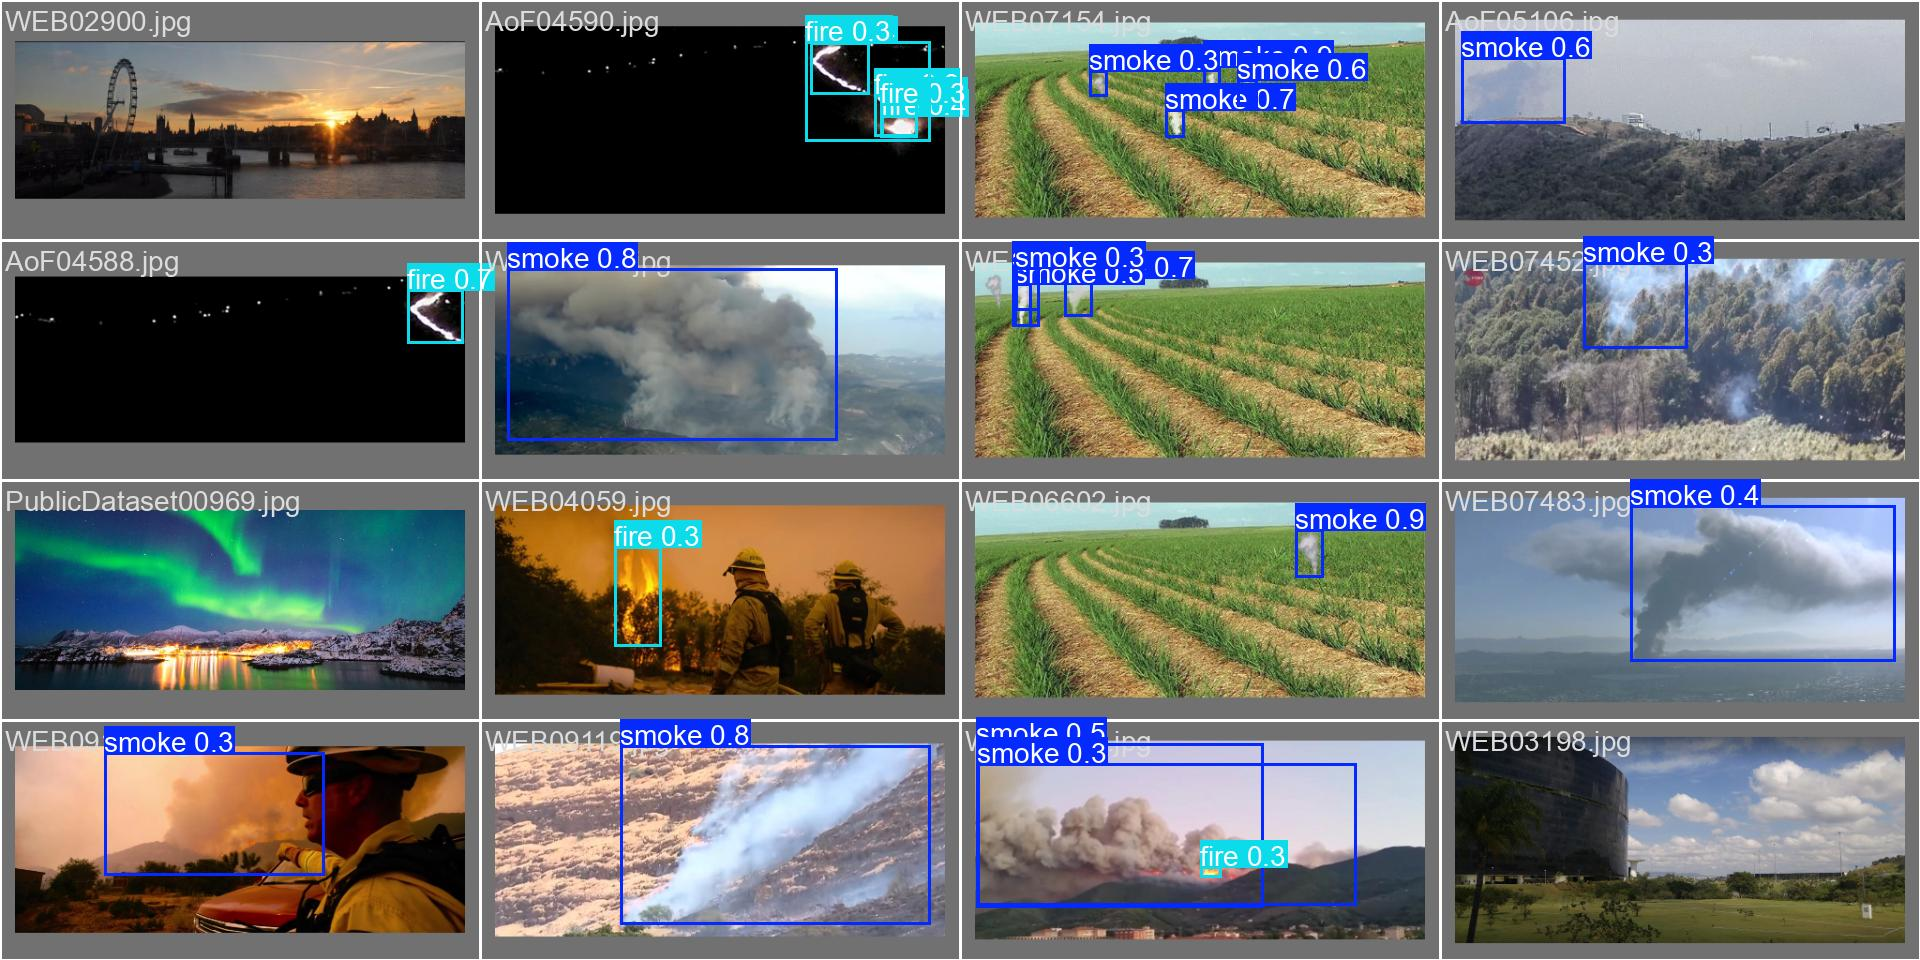

In [ ]:
Image.open(f"runs/detect/train/val_batch0_pred.jpg")

Улучшим наш безйлайн.
Увеличим количество эпох и размер изображения, добавим автоматическую аугментацию

In [ ]:
model_s = YOLO('yolov8s.pt')
results_s = model_s.train(
    data=output_path, epochs=15, imgsz=640, batch=8,
    name='yolov8s_fire_aug',
    augment=True,
    lr0=0.01
)

100%|██████████| 21.5M/21.5M [00:00<00:00, 319MB/s]

Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=./updated_config.yml, epochs=15, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8s_fire_aug, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False

train: Scanning /root/.cache/kagglehub/datasets/sayedgamal99/smoke-fire-detection-yolo/versions/1/data/train/labels.cache... 14122 images, 6458 backgrounds, 0 corrupt: 100%|██████████| 14122/14122 [00:00<?, ?it/s]

train: WARNING ⚠️ /root/.cache/kagglehub/datasets/sayedgamal99/smoke-fire-detection-yolo/versions/1/data/train/images/WEB02521.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /root/.cache/kagglehub/datasets/sayedgamal99/smoke-fire-detection-yolo/versions/1/data/train/images/WEB06626.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /root/.cache/kagglehub/datasets/sayedgamal99/smoke-fire-detection-yolo/versions/1/data/train/images/WEB07199.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /root/.cache/kagglehub/datasets/sayedgamal99/smoke-fire-detection-yolo/versions/1/data/train/images/WEB07271.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /root/.cache/kagglehub/datasets/sayedgamal99/smoke-fire-detection-yolo/versions/1/data/train/images/WEB07278.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /root/.cache/kagglehub/datasets/sayedgamal99/smoke-fire-detection-yolo/versions/1/data/train/images/WEB07297.jpg: corrupt JPEG restored and saved
train: WARNING ⚠

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 532.6±136.2 MB/s, size: 79.9 KB)


val: Scanning /root/.cache/kagglehub/datasets/sayedgamal99/smoke-fire-detection-yolo/versions/1/data/val/labels.cache... 3099 images, 1375 backgrounds, 0 corrupt: 100%|██████████| 3099/3099 [00:00<?, ?it/s]

val: WARNING ⚠️ /root/.cache/kagglehub/datasets/sayedgamal99/smoke-fire-detection-yolo/versions/1/data/val/images/WEB07535.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /root/.cache/kagglehub/datasets/sayedgamal99/smoke-fire-detection-yolo/versions/1/data/val/images/WEB07536.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /root/.cache/kagglehub/datasets/sayedgamal99/smoke-fire-detection-yolo/versions/1/data/val/images/WEB07539.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /root/.cache/kagglehub/datasets/sayedgamal99/smoke-fire-detection-yolo/versions/1/data/val/images/WEB07542.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /root/.cache/kagglehub/datasets/sayedgamal99/smoke-fire-detection-yolo/versions/1/data/val/images/WEB07561.jpg: corrupt JPEG restored and saved


Plotting labels to runs/detect/yolov8s_fire_aug/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8s_fire_aug
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      2.07G      1.779      2.274      1.649          5        640: 100%|██████████| 1766/1766 [06:07<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:31<00:00,  6.24it/s]


                   all       3099       3932      0.344      0.378      0.301      0.119

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      3.04G      1.807      2.065      1.651          6        640: 100%|██████████| 1766/1766 [05:55<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:28<00:00,  6.83it/s]


                   all       3099       3932      0.505      0.429      0.426      0.182

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      3.04G       1.76      1.977      1.614          4        640: 100%|██████████| 1766/1766 [05:52<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:28<00:00,  6.86it/s]


                   all       3099       3932      0.543      0.463       0.48      0.226

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      3.04G      1.699      1.862      1.586          6        640: 100%|██████████| 1766/1766 [05:51<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:28<00:00,  6.85it/s]


                   all       3099       3932      0.556      0.504      0.512      0.242

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      3.04G      1.641      1.759      1.545          8        640: 100%|██████████| 1766/1766 [05:51<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:29<00:00,  6.65it/s]


                   all       3099       3932       0.61      0.525      0.562      0.283
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      3.04G      1.743      1.881      1.637          0        640: 100%|██████████| 1766/1766 [05:41<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:28<00:00,  6.82it/s]


                   all       3099       3932      0.619      0.499      0.552      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      3.04G      1.704      1.763      1.614          2        640: 100%|██████████| 1766/1766 [05:38<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:29<00:00,  6.63it/s]


                   all       3099       3932      0.621      0.534      0.575      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      3.04G      1.655      1.673      1.566          6        640: 100%|██████████| 1766/1766 [05:38<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:28<00:00,  6.91it/s]


                   all       3099       3932      0.665      0.553       0.61      0.311

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      3.04G      1.627      1.586      1.544          0        640: 100%|██████████| 1766/1766 [05:39<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:28<00:00,  6.93it/s]


                   all       3099       3932      0.656      0.572      0.626      0.329

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      3.04G      1.594      1.531      1.521          0        640: 100%|██████████| 1766/1766 [05:42<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:28<00:00,  6.90it/s]


                   all       3099       3932      0.666      0.566      0.631      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      3.06G       1.56      1.456      1.488          0        640: 100%|██████████| 1766/1766 [05:40<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:28<00:00,  6.83it/s]


                   all       3099       3932      0.686      0.602      0.665      0.363

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15       3.1G      1.529      1.391      1.472          0        640: 100%|██████████| 1766/1766 [05:39<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:28<00:00,  6.71it/s]

                   all       3099       3932       0.67      0.609      0.664      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15       3.1G      1.493       1.33      1.451          1        640: 100%|██████████| 1766/1766 [05:40<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:28<00:00,  6.84it/s]


                   all       3099       3932      0.695      0.618      0.684       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15       3.1G      1.447      1.269      1.407          9        640: 100%|██████████| 1766/1766 [05:40<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:28<00:00,  6.88it/s]

                   all       3099       3932      0.714      0.629      0.699      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15       3.1G      1.428      1.217      1.403          2        640: 100%|██████████| 1766/1766 [05:40<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:27<00:00,  7.00it/s]


                   all       3099       3932      0.719      0.649      0.713      0.407

15 epochs completed in 1.561 hours.
Optimizer stripped from runs/detect/yolov8s_fire_aug/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/yolov8s_fire_aug/weights/best.pt, 22.5MB

Validating runs/detect/yolov8s_fire_aug/weights/best.pt...
Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [00:38<00:00,  5.07it/s]


                   all       3099       3932      0.698      0.643      0.699      0.409
                 smoke       1550       1756      0.745      0.702      0.759      0.472
                  fire        879       2176       0.65      0.584      0.639      0.346
Speed: 0.2ms preprocess, 7.9ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/yolov8s_fire_aug


По аналогии выведем матрицу ошибкок.

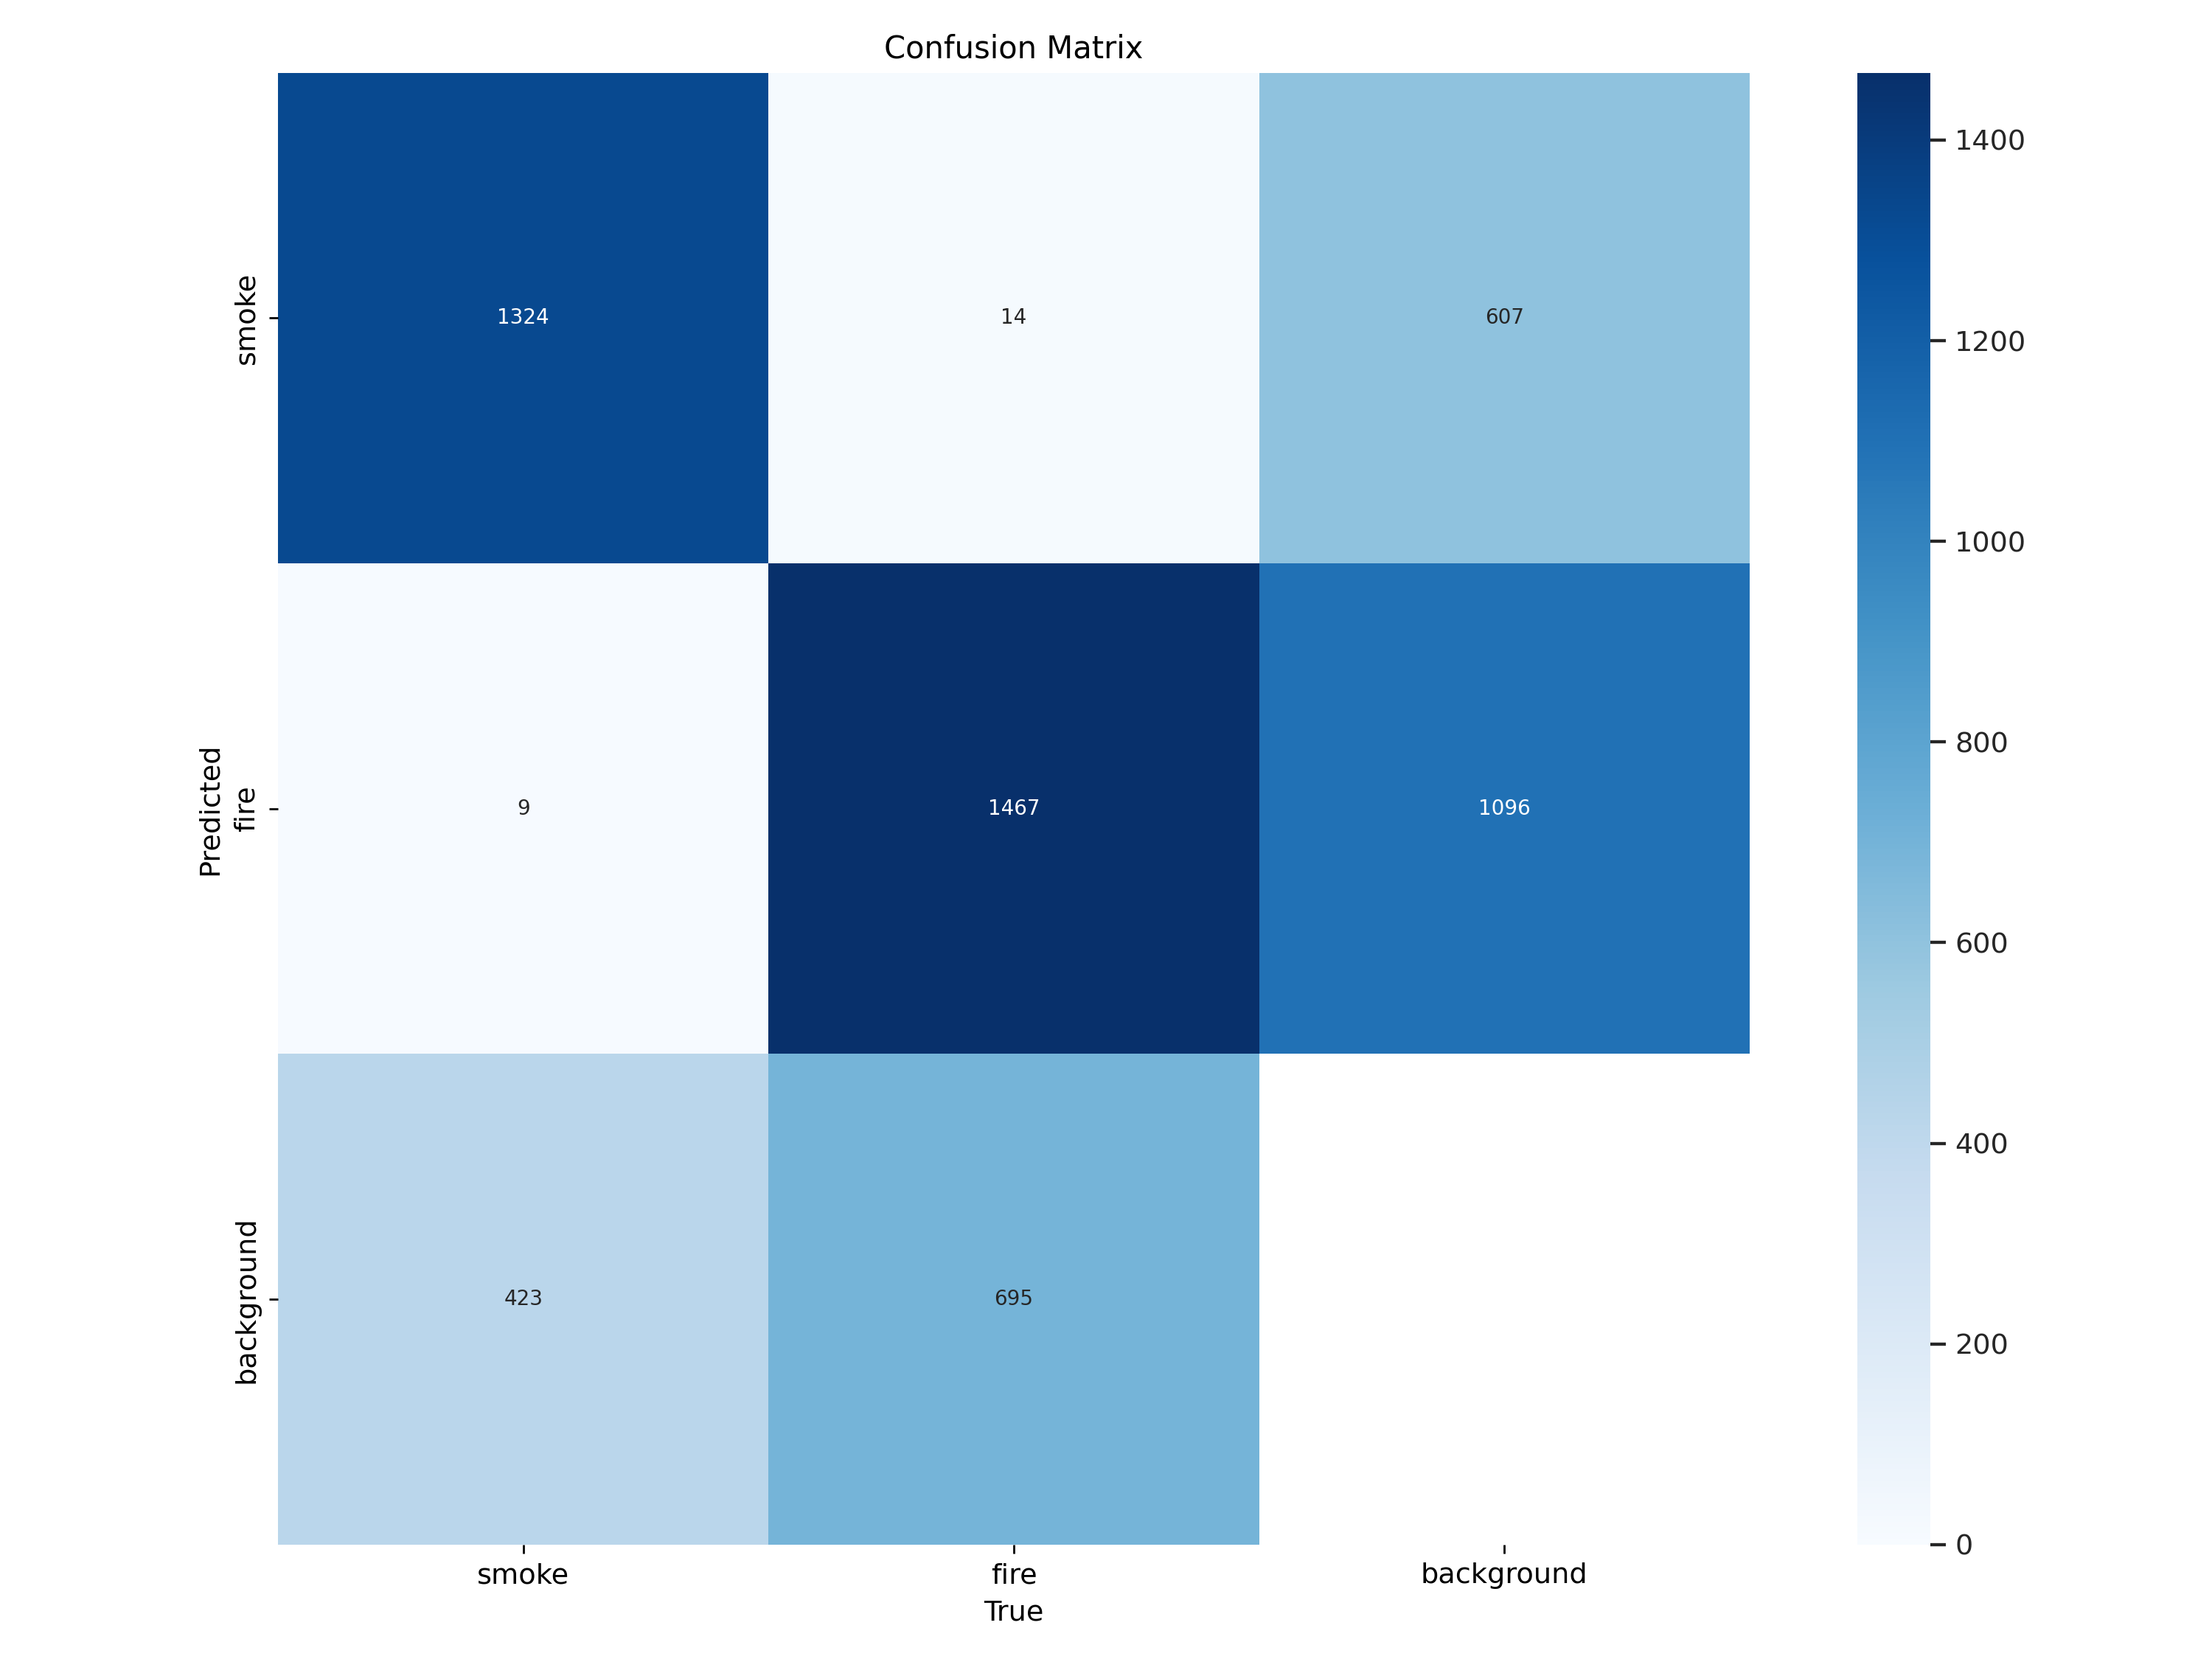

In [ ]:
Image.open(f"runs/detect/yolov8s_fire_aug/confusion_matrix.png")

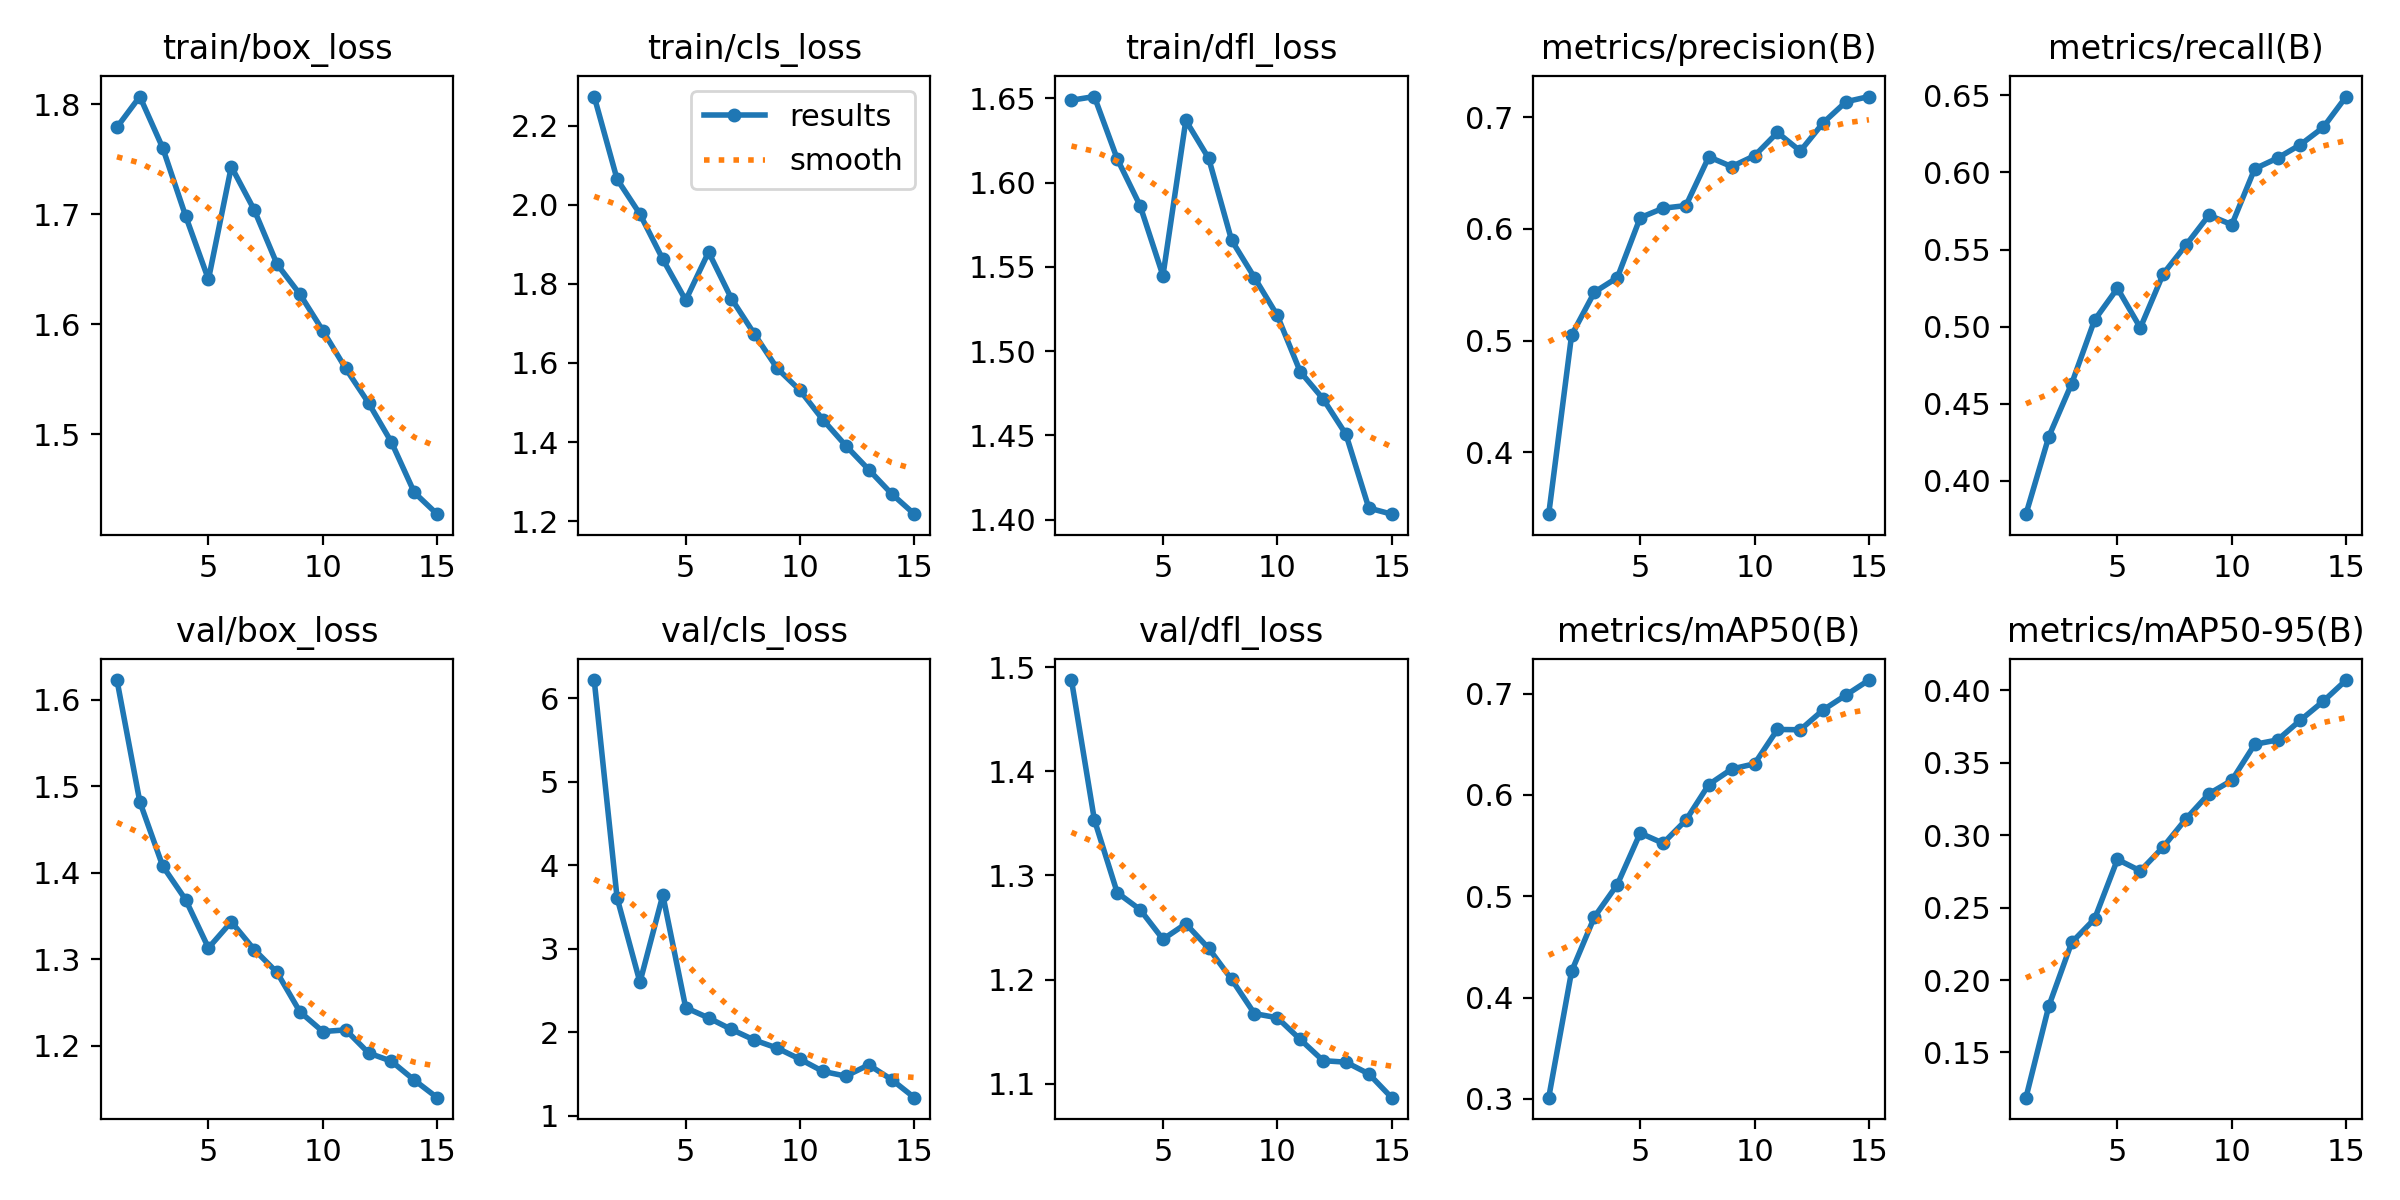

In [ ]:
Image.open(f"runs/detect/yolov8s_fire_aug/results.png")

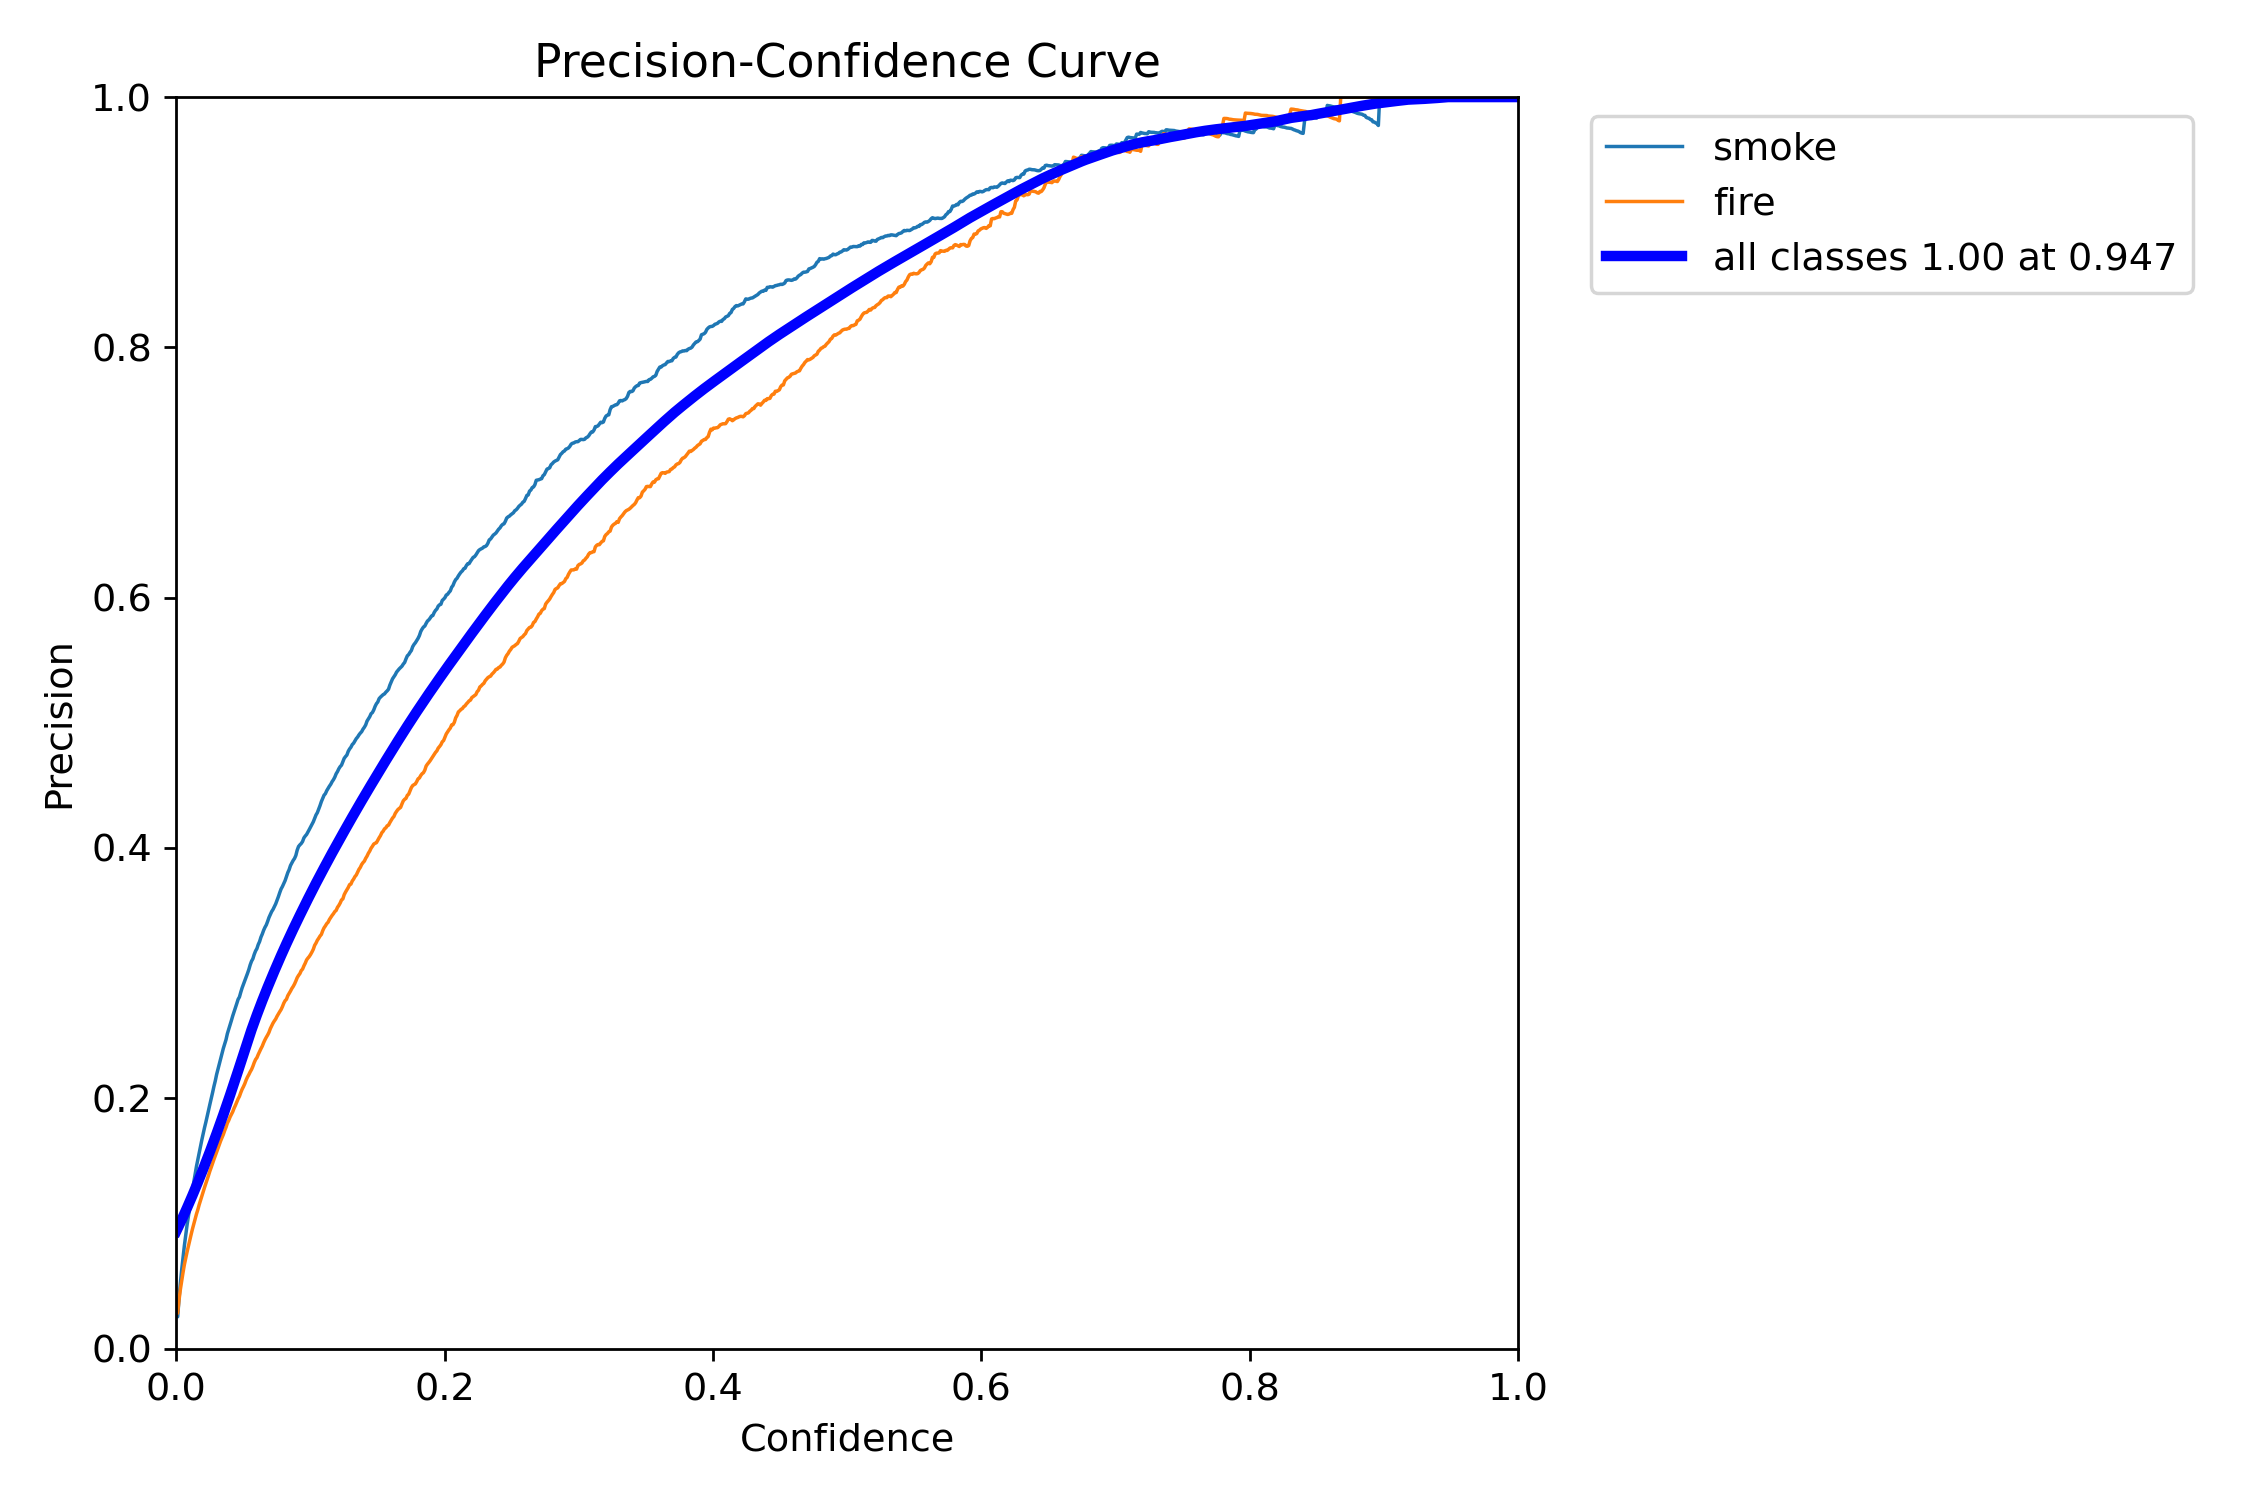

In [ ]:
Image.open(f"runs/detect/yolov8s_fire_aug/P_curve.png")

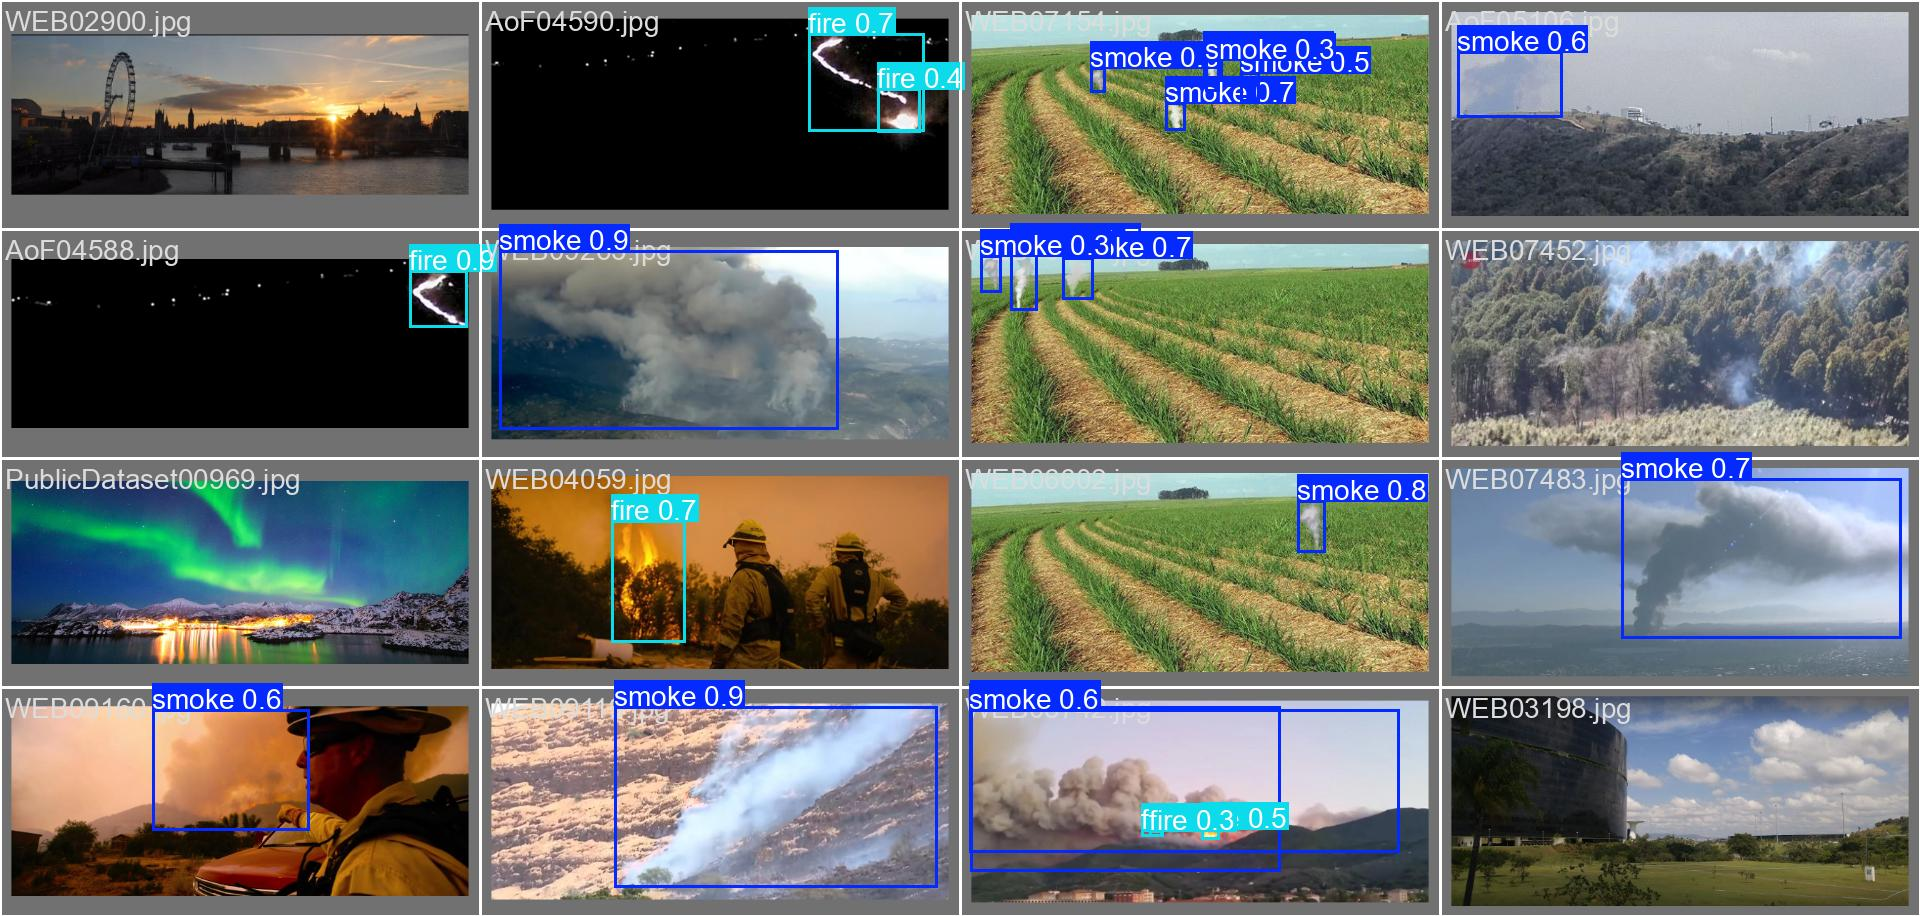

In [ ]:
Image.open(f"runs/detect/yolov8s_fire_aug/val_batch0_pred.jpg")

Изучая графики, можно заметить, что после аугментации метрики нашей модели увеличись. Что говорит о хорошем улучшении бейзлайна

In [ ]:
%ls {path}

data/  data.yaml


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import os
import cv2
import numpy as np

Установим библиотеку torchmetrics, для вычисления метрики maP

In [10]:
%pip install torchmetrics

In [11]:
import os
import yaml
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import torchvision.transforms as T
from torchmetrics.detection.mean_ap import MeanAveragePrecision

Загрузим датасет, совместимый с torch

In [12]:
with open(path + '/data.yaml') as f:
    data_config = yaml.safe_load(f)

train_img_dir = path + '/' + data_config.get('train', '')
val_img_dir =  path + '/' + data_config.get('val', '')

train_label_dir =  data_config.get('train_labels', train_img_dir.replace('images', 'labels'))
val_label_dir =  data_config.get('val_labels',   val_img_dir.replace('images', 'labels'))

class_names = data_config.get('names', [])
num_classes = len(class_names)

print("found classes:", num_classes)

found classes: 2


Напишем даталоадер для датасета

In [13]:
class YoloDataset(Dataset):
    def __init__(self, img_dir, label_dir, img_size=224, S=7, B=1, C=20, transform=None):
        self.img_dir = img_dir
        self.label_dir = label_dir
        self.img_files = [f for f in os.listdir(img_dir) if f.lower().endswith(('jpg','jpeg','png'))]
        self.img_size = img_size
        self.S = S
        self.B =B
        self.C=C
        self.transform = transform if transform else T.Compose([
            T.Resize((img_size, img_size)),
            T.ToTensor(),
        ])

    def __len__(self):
        return len(self.img_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_files[idx])
        label_path = os.path.join(self.label_dir, os.path.splitext(self.img_files[idx])[0] + '.txt')
        img = Image.open(img_path).convert('RGB')
        img = self.transform(img)

        target = torch.zeros((self.S, self.S, 5*self.B + self.C))
        boxes = []
        labels = []

        if os.path.exists(label_path):
            for line in open(label_path, 'r').read().splitlines():
                cls, x_ctr, y_ctr, w, h = map(float, line.split())
                cls = int(cls)

                i = int(x_ctr * self.S)
                j = int(y_ctr * self.S)
                x_cell = x_ctr * self.S - i
                y_cell = y_ctr * self.S - j

                if target[j, i, 4] == 0:
                    target[j, i, 0] = x_cell
                    target[j, i, 1] = y_cell
                    target[j, i, 2] = w
                    target[j, i, 3] = h
                    target[j, i, 4] = 1
                    target[j, i, 5 + cls] = 1

                x_abs = x_ctr * self.img_size
                y_abs = y_ctr * self.img_size
                w_abs = w * self.img_size
                h_abs = h * self.img_size
                x1 = x_abs - w_abs/2
                y1 = y_abs - h_abs/2
                x2 = x_abs + w_abs/2
                y2 = y_abs + h_abs/2
                boxes.append([x1, y1, x2, y2])
                labels.append(cls)

        boxes = torch.tensor(boxes, dtype=torch.float32) if boxes  else torch.zeros((0,4), dtype=torch.float32)
        labels = torch.tensor(labels, dtype=torch.int64) if labels else torch.zeros((0,), dtype=torch.int64)
        return img, target, boxes, labels

Объявим основные параметры модели.

In [14]:
def collate_fn(batch):
    imgs = torch.stack([item[0] for item in batch], dim=0)
    yolo_targets = torch.stack([item[1] for item in batch], dim=0)
    boxes_list = [item[2] for item in batch]
    labels_list = [item[3] for item in batch]
    return imgs, yolo_targets, boxes_list, labels_list

img_size = 224
S = 7
B = 1
C = num_classes
batch_size = 16

train_dataset = YoloDataset(train_img_dir, train_label_dir, img_size, S, B, C)
val_dataset = YoloDataset(val_img_dir, val_label_dir,  img_size, S, B, C)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,  num_workers=0, pin_memory=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True, collate_fn=collate_fn)

Выберем девайс на котором будет проходить обучение

In [15]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


Реализуем архитектуру модели

In [ ]:
class SimpleYolo(nn.Module):
    def __init__(self, S=7, B=1, C=20):
        super().__init__()
        self.S = S
        self.B = B
        self.C = C

        self.backbon = nn.Sequential(
            nn.Conv2d(3,16, 3, 1, 1), nn.BatchNorm2d(16), nn.LeakyReLU(0.1), nn.MaxPool2d(2,2),
            nn.Conv2d(16, 32, 3, 1, 1), nn.BatchNorm2d(32), nn.LeakyReLU(0.1), nn.MaxPool2d(2,2),
            nn.Conv2d(32, 64, 3, 1, 1), nn.BatchNorm2d(64), nn.LeakyReLU(0.1), nn.MaxPool2d(2,2),
            nn.Conv2d(64, 128, 3, 1, 1), nn.BatchNorm2d(128), nn.LeakyReLU(0.1), nn.MaxPool2d(2,2),
            nn.Conv2d(128, 256,3, 1, 1), nn.BatchNorm2d(256), nn.LeakyReLU(0.1), nn.MaxPool2d(2,2),
            )
        self.pred = nn.Conv2d(256, self.B*5 + self.C, 1)

    def forward(self, x):
        x = self.backbon(x)
        x = self.pred(x)
        x = x.permute(0, 2, 3, 1)
        return x



Объвим модель

In [18]:
model = SimpleYolo(S=S, B=B, C=C).to(device)

Выведем её архитектуру

In [19]:
print(model)

SimpleYolo(
  (backbon): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.1)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.1)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.1)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(12

Объвим класс для вычисления ошибки модели.
Т.к. мы работаем с bounding box-ам, то такой класс получился достаточно сложным.

In [20]:
class YoloLoss(nn.Module):
    def __init__(self, S=7, B=1, C=20, lambda_coord=5, lambda_noobj=0.5):
        super().__init__()
        self.S = S
        self.B = B
        self.C = C
        self.lambda_coord = lambda_coord
        self.lambda_noobj = lambda_noobj
        self.mse = nn.MSELoss(reduction='sum')
        self.bce = nn.BCEWithLogitsLoss(reduction='none')
        self.ce = nn.CrossEntropyLoss(reduction='none')

    def forward(self, preds, target):
        obj_mask = target[..., 4]
        noobj_mask = 1-obj_mask

        pred_box = torch.sigmoid(preds[..., :4])
        pred_obj = preds[..., 4]
        pred_cls = preds[..., 5:]
        tgt_box = target[..., :4]
        tgt_obj = target[..., 4]
        tgt_cls_oh = target[..., 5:]

        coord_loss = self.mse(obj_mask.unsqueeze(-1) * pred_box,obj_mask.unsqueeze(-1)*tgt_box)
        obj_loss = torch.sum(obj_mask* self.bce(pred_obj, tgt_obj))
        noobj_loss = torch.sum(noobj_mask *self.bce(pred_obj, tgt_obj))

        pred_cls_flat = pred_cls.reshape(-1, self.C)
        tgt_cls_ids = torch.argmax(tgt_cls_oh, dim=-1).reshape(-1)
        cls_loss_all = self.ce(pred_cls_flat, tgt_cls_ids)
        cls_loss = torch.sum(obj_mask.reshape(-1) * cls_loss_all)

        total_loss = (self.lambda_coord * coord_loss + obj_loss + self.lambda_noobj * noobj_loss + cls_loss)
        return total_loss

loss_fn = YoloLoss(S=S, B=B, C=C).to(device)

Опишем процесс обучения модели.

Для визуализации процесса обучения используем библиотеку tqdm.

In [ ]:
from tqdm import tqdm

map50_metric = MeanAveragePrecision(iou_thresholds=[0.5])
map50_95_metric = MeanAveragePrecision()

def train_epoch(loader, model, optimizer, loss_fn, device):
    model.train()
    total_loss = 0

    for imgs, y_targets, _, _ in tqdm(loader, desc='Training', leave=False):
        imgs = imgs.to(device)
        y_targets = y_targets.to(device)
        preds = model(imgs)
        loss = loss_fn(preds, y_targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print("loss: ", total_loss / len(loader))

def eval(loader, model, device, conf_thresh=0.0):
    model.eval()
    map50_metric.reset()
    map50_95_metric.reset()
    with torch.no_grad():
        for imgs, _, boxes_l, labels_l in loader:
            imgs = imgs.to(device)
            preds = model(imgs).cpu()

            for b in range(imgs.size(0)):
                det_boxes = []
                det_scores = []
                det_labels = []
                for i in range(S):
                    for j in range(S):
                        conf = torch.sigmoid(preds[b,i,j,4])
                        if conf < conf_thresh:
                            continue
                        x_cell, y_cell, w_cell, h_cell = torch.sigmoid(preds[b, i, j, :4])
                        x_center = (j + x_cell)/S
                        y_center = (i + y_cell)/S
                        w = w_cell
                        h = h_cell

                        x1 = (x_center-w/2) * img_size
                        y1 = (y_center-h/2) * img_size
                        x2 = (x_center + w/2) * img_size
                        y2 = (y_center + h/2) * img_size
                        det_boxes.append([x1, y1, x2, y2])

                        cls_probs = torch.softmax(preds[b, i, j, 5:], dim=-1)
                        cls_score, cls_idx = torch.max(cls_probs, dim=-1)
                        det_scores.append((conf * cls_score).item())
                        det_labels.append(cls_idx.item())

                if len(det_boxes) > 0:
                    batch_pred = {
                        'boxes': torch.tensor(det_boxes, dtype=torch.float32),
                        'scores': torch.tensor(det_scores, dtype=torch.float32),
                        'labels': torch.tensor(det_labels,  dtype=torch.int64)
                    }
                else:
                    batch_pred = {
                        'boxes':torch.zeros((0,4),  dtype=torch.float32),
                        'scores':torch.zeros((0,),dtype=torch.float32),
                        'labels':torch.zeros((0,), dtype=torch.int64)
                    }

                gt = {
                    'boxes':boxes_l[b].to(torch.float32),
                    'labels':labels_l[b]
                }
                map50_metric.update([batch_pred], [gt])
                map50_95_metric.update([batch_pred], [gt])

    res50 = map50_metric.compute()
    res50_95 = map50_95_metric.compute()
    print("val mAP50:", res50['map_50'])
    print("val mAP50-95:",res50_95['map'])

Опишем оптизимизатор и запустим процесс обучения

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=1e-4)
epochs = 10

for epoch in range(1, epochs+1):
    print("epoch", epoch, "/", epochs)
    train_epoch(train_loader, model, optimizer,loss_fn, device)
    eval(val_loader, model, device)

epoch 1 / 10


loss:  81.61064353588618
val mAP50: tensor(0.0170)
val mAP50-95: tensor(0.0033)
epoch 2 / 10


loss:  63.338711203967186
val mAP50: tensor(0.0261)
val mAP50-95: tensor(0.0051)
epoch 3 / 10


loss:  58.24633765301645
val mAP50: tensor(0.0386)
val mAP50-95: tensor(0.0080)
epoch 4 / 10


loss:  54.3438431015101
val mAP50: tensor(0.0218)
val mAP50-95: tensor(0.0042)
epoch 5 / 10


loss:  50.816091358189134
val mAP50: tensor(0.0417)
val mAP50-95: tensor(0.0083)
epoch 6 / 10


loss:  47.743693505111125
val mAP50: tensor(0.0395)
val mAP50-95: tensor(0.0085)
epoch 7 / 10


loss:  44.85357119839972
val mAP50: tensor(0.0499)
val mAP50-95: tensor(0.0105)
epoch 8 / 10


loss:  41.82236483304984
val mAP50: tensor(0.0418)
val mAP50-95: tensor(0.0090)
epoch 9 / 10


loss:  39.257487190134256
val mAP50: tensor(0.0525)
val mAP50-95: tensor(0.0114)
epoch 10 / 10


loss:  36.79168447794758
val mAP50: tensor(0.0466)
val mAP50-95: tensor(0.0101)


Как можем заметить метрики получились намного хуже, чем у библиотечной модели
Это связано с тем, что архитектура YOLO подобной модели достаточно сложная и реализовать её с хорошей точностью достаточно не тривиальная задача.

Попробуем изменить наш бейзлайн изменим количество эпох и learning rate

In [22]:
model_improve = SimpleYolo(S=S, B=B, C=C).to(device)

In [23]:
init_lr = 1e-5
optimizer = optim.AdamW(model_improve.parameters(), lr=init_lr)
epochs = 30

Запустим процесс обучения

In [24]:
for epoch in range(1, epochs+1):
    print("epoch", epoch, "/", epochs)
    train_epoch(train_loader, model_improve, optimizer, loss_fn, device)
    eval(val_loader, model, device)

epoch 1 / 30


loss:  148.00045385825135
val mAP50: tensor(0.0007)
val mAP50-95: tensor(0.0001)
epoch 2 / 30


loss:  87.85367151780954
val mAP50: tensor(0.0007)
val mAP50-95: tensor(0.0001)
epoch 3 / 30


loss:  76.7033820384491
val mAP50: tensor(0.0007)
val mAP50-95: tensor(0.0001)
epoch 4 / 30


loss:  71.59968857857001
val mAP50: tensor(0.0007)
val mAP50-95: tensor(0.0001)
epoch 5 / 30


loss:  68.61332687516175
val mAP50: tensor(0.0007)
val mAP50-95: tensor(0.0001)
epoch 6 / 30


loss:  66.42844158660785
val mAP50: tensor(0.0007)
val mAP50-95: tensor(0.0001)
epoch 7 / 30


loss:  64.7435373325715
val mAP50: tensor(0.0007)
val mAP50-95: tensor(0.0001)
epoch 8 / 30


loss:  63.43729283558553
val mAP50: tensor(0.0007)
val mAP50-95: tensor(0.0001)
epoch 9 / 30


loss:  62.22179736853456
val mAP50: tensor(0.0007)
val mAP50-95: tensor(0.0001)
epoch 10 / 30


loss:  61.26125925178571
val mAP50: tensor(0.0007)
val mAP50-95: tensor(0.0001)
epoch 11 / 30


loss:  60.20200596525337
val mAP50: tensor(0.0007)
val mAP50-95: tensor(0.0001)
epoch 12 / 30


loss:  59.1716384434079
val mAP50: tensor(0.0007)
val mAP50-95: tensor(0.0001)
epoch 13 / 30


loss:  58.415580127409335
val mAP50: tensor(0.0007)
val mAP50-95: tensor(0.0001)
epoch 14 / 30


loss:  57.73646679118968
val mAP50: tensor(0.0007)
val mAP50-95: tensor(0.0001)
epoch 15 / 30


loss:  56.89667993979708
val mAP50: tensor(0.0007)
val mAP50-95: tensor(0.0001)
epoch 16 / 30


loss:  56.09956071492905
val mAP50: tensor(0.0007)
val mAP50-95: tensor(0.0001)
epoch 17 / 30


loss:  55.500870832095465
val mAP50: tensor(0.0007)
val mAP50-95: tensor(0.0001)
epoch 18 / 30


loss:  54.80547283081884
val mAP50: tensor(0.0007)
val mAP50-95: tensor(0.0001)
epoch 19 / 30


loss:  54.09912698428196
val mAP50: tensor(0.0007)
val mAP50-95: tensor(0.0001)
epoch 20 / 30


loss:  53.43311863118363
val mAP50: tensor(0.0007)
val mAP50-95: tensor(0.0001)
epoch 21 / 30


loss:  52.97287329028984
val mAP50: tensor(0.0007)
val mAP50-95: tensor(0.0001)
epoch 22 / 30


loss:  52.15001040379836
val mAP50: tensor(0.0007)
val mAP50-95: tensor(0.0001)
epoch 23 / 30


loss:  51.683810405796
val mAP50: tensor(0.0007)
val mAP50-95: tensor(0.0001)
epoch 24 / 30


loss:  51.11793772955578
val mAP50: tensor(0.0007)
val mAP50-95: tensor(0.0001)
epoch 25 / 30


loss:  50.47264170295655
val mAP50: tensor(0.0007)
val mAP50-95: tensor(0.0001)
epoch 26 / 30


loss:  49.98415314273683
val mAP50: tensor(0.0007)
val mAP50-95: tensor(0.0001)
epoch 27 / 30


loss:  49.425938456136805
val mAP50: tensor(0.0007)
val mAP50-95: tensor(0.0001)
epoch 28 / 30


loss:  49.02274388824152
val mAP50: tensor(0.0007)
val mAP50-95: tensor(0.0001)
epoch 29 / 30


loss:  48.40930068533391
val mAP50: tensor(0.0007)
val mAP50-95: tensor(0.0001)
epoch 30 / 30


loss:  47.948002994533034
val mAP50: tensor(0.0007)
val mAP50-95: tensor(0.0001)


Метрики ухудшились, скорее всего это связно с настройкой learning rate

Ниже представлены итоговые результаты

| Model                                     | mAP50  | mAP50-95 |
| ----------------------------------------- | ------ | -------- |
| Yolo                                      | 0.647  | 0.357    |
| Yolo <br> (Улучшенный baseline)               | 0.699  | 0.409    |
| Имплементация YOLO                        | 0.046  | 0.010    |
| Имплементация YOLO <br> (Улучшенный baseline) | 0.0007 | 0.0001   |

В результате данной лаборатороной работы были изучены модели YOLO и сделана попытка реализовать собственную имплементацию. YOLO подобная архитектура достаточно сложная, поэтому получившиеся метрики оказались намного ниже. При этом точность библиотечного решения "из коробки" обладает высокими метриками и простым функционалом по аугментации датасета